# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 14 (Friday) 11:00 pm </b> </font>

<font color="blue"> Jimmy Nguyen </font>

# Introduction

For this assignment, I will be looking over a set of data to analyze using the linear regression model. First I must adjust the LinearRegress class to pass the preliminary test before moving onto my data. After passing the test, I can then use the same model on my data and preform an analysis based on the model.

# Data

This collection of data represents a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel. The data was preprocessed.

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This is a python magic command.
# This command allows the output of matplotlib to be displayed inline, i.e. under the cell.
%matplotlib inline

In [155]:
df = pd.read_csv("airfoil_self_noise.dat", names = ["Frequency", "Angle of Atk", "Chord Length", "Velocity", 
                                                    "Suction side displacement thickness", "Scaled sound pressure level"], delim_whitespace = True)
df

Frequency  Angle of Atk  Chord Length  Velocity  \
0           800           0.0        0.3048      71.3   
1          1000           0.0        0.3048      71.3   
2          1250           0.0        0.3048      71.3   
3          1600           0.0        0.3048      71.3   
4          2000           0.0        0.3048      71.3   
5          2500           0.0        0.3048      71.3   
6          3150           0.0        0.3048      71.3   
7          4000           0.0        0.3048      71.3   
8          5000           0.0        0.3048      71.3   
9          6300           0.0        0.3048      71.3   
10         8000           0.0        0.3048      71.3   
11        10000           0.0        0.3048      71.3   
12        12500           0.0        0.3048      71.3   
13        16000           0.0        0.3048      71.3   
14          500           0.0        0.3048      55.5   
15          630           0.0        0.3048      55.5   
16          800           0.0        0.3048      55.5   
17         1000           0.0        0.3048      55.5   
18         1250           0.0        0.3048      55.5   
19         1600           0.0        0.3048      55.5   
20         2000           0.0        0.3048      55.5   
21         2500           0.0        0.3048      55.5   
22         3150           0.0        0.3048      55.5   
23         4000           0.0        0.3048      55.5   
24         5000           0.0        0.3048      55.5   
25         6300           0.0        0.3048      55.5   
26         8000           0.0        0.3048      55.5   
27        10000           0.0        0.3048      55.5   
28        12500           0.0        0.3048      55.5   
29          200           0.0        0.3048      39.6   
...         ...           ...           ...       ...   
1473        200          15.6        0.1016      71.3   
1474        250          15.6        0.1016      71.3   
1475        315          15.6        0.1016      71.3   
1476        400          15.6        0.1016      71.3   
1477        500          15.6        0.1016      71.3   
1478        630          15.6        0.1016      71.3   
1479        800          15.6        0.1016      71.3   
1480       1000          15.6        0.1016      71.3   
1481       1250          15.6        0.1016      71.3   
1482       1600          15.6        0.1016      71.3   
1483       2000          15.6        0.1016      71.3   
1484       2500          15.6        0.1016      71.3   
1485       3150          15.6        0.1016      71.3   
1486       4000          15.6        0.1016      71.3   
1487        200          15.6        0.1016      39.6   
1488        250          15.6        0.1016      39.6   
1489        315          15.6        0.1016      39.6   
1490        400          15.6        0.1016      39.6   
1491        500          15.6        0.1016      39.6   
1492        630          15.6        0.1016      39.6   
1493        800          15.6        0.1016      39.6   
1494       1000          15.6        0.1016      39.6   
1495       1250          15.6        0.1016      39.6   
1496       1600          15.6        0.1016      39.6   
1497       2000          15.6        0.1016      39.6   
1498       2500          15.6        0.1016      39.6   
1499       3150          15.6        0.1016      39.6   
1500       4000          15.6        0.1016      39.6   
1501       5000          15.6        0.1016      39.6   
1502       6300          15.6        0.1016      39.6   

      Suction side displacement thickness  Scaled sound pressure level  
0                                0.002663                      126.201  
1                                0.002663                      125.201  
2                                0.002663                      125.951  
3                                0.002663                      127.591  
4                                0.002663                      127.461  
5                                

The data shown is based on six attributes: Frequency (in hertzs), angle of attack (in degrees), chord length (in meters), free-stream velocity (meters per second), and suction side displacement thickness (in meters). The data displays the scaled sound pressure level based on the varying inputs. 

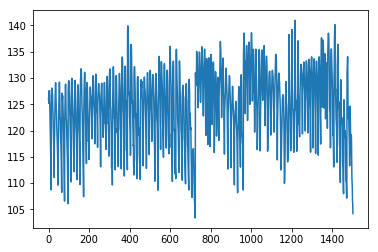

In [156]:
plt.plot('Scaled sound pressure level', data = df)

This plot shows each sample and its resulting pressure level based on the controlled inputs. The data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. 

# Preliminary Observation

This graph represents the tests done in the airfoil experiments, and based on the data, the later samples, the overall pressure level is higher, but they tend to be lower as the frequency increased, implying that it is a much bigger factor compared to the other attributes.

# Method

 - Linear models are used when we want to predict something, and we have existing data to base our predictions. Supervised learning is used for this process, as we are guiding the machine using our existing data. Some advantages to using linear models are that they are simple, stable, scalable, and can help with avooiding overfitting. Least mean square updates the weight one data point at a time and updating the parameters. Least squares use all available data and will find the best fit.
 - In the LinearRegress class, I implimented the train method, which helps determine the weight, and the use method generates the results in a graph. In the LMS class, I implimented the train_step method, which will update the weight as it goes through the data point, and the train method is used to run train_step multiple times based on the amount of data points.

### Super Classs Definition

In [142]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [143]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        ## TODO: replace this with your codes
        X1 = self.add_ones(X)
        
        self.w = np.linalg.pinv(X1.T @ X1) @ X1.T @ T
    # apply the learned model to data X
    def use(self, X):
        ## TODO: replace this with your codes
        X1 = self.add_ones(X)
                       
        return X1 @ self.w

### Least Mean Squares

In [144]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        ## TODO: replace this with your codes
        for x, t in zip(X, T):
            self.train_step(x, t)
    
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        ## TODO: replace this with your codes
        #x = x.reshape(1, x.size)
        #t = t.reshape(t.size, 1)
        
        x1 = np.hstack((1, x))
        
        if self.w is None:
            self.w = np.zeros(x1.shape[0])
        
        self.w = self.w - self.alpha * (self.w.T @ x1 - t) * x1
            
        
    # apply the current model to data X
    def use(self, X):
        ## TODO: replace this with your codes
        X1 = self.add_ones(X)
        return X1 @ self.w.reshape(-1, 1)

### Preliminary Test

In this following tests, we examine if the implementation is correct with a simple test data, $f(x) = -2 x + 3.2$ where $x \in \{0, 1, 2, \dots, 9, 10 \}$. 

In [145]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

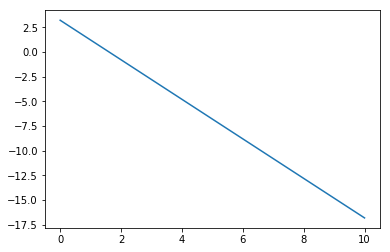

In [146]:
# least square model
ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

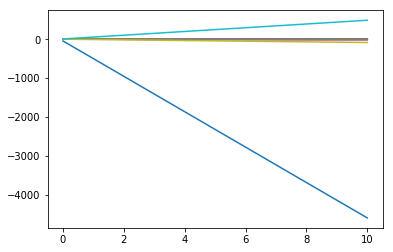

In [147]:
# least mean square model
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

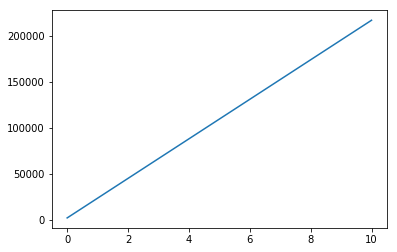

In [148]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Apply LS and LMS methods on the data and discuss the results.
Please explain your experiments and related codes. 
**Don't forget to analyze your observations and discuss about them. **
You may have subsections of results and discussions here.


In [175]:
T = df.loc[:, 'Scaled sound pressure level'].copy()
X = df.iloc[:, :-1].copy()
N = 1503

In [176]:
X = X.values
T = T.values

# Least Squares

LS Model using the our existing data on airfoil tests, finding the best predictions using all availible samples.

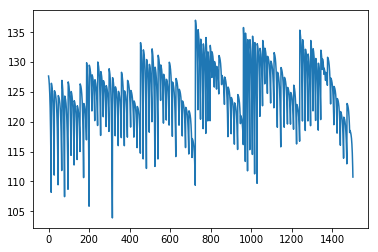

In [177]:
#Least Squares
ls.train(X, T)
plt.plot(ls.use(X))

# Least Mean Squares

LMS Model using our existing data on airfoil tests, adjusting the weights by going through every sample one-by-one.

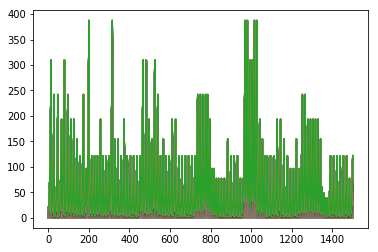

In [179]:
#Least mean squares
lms = LMS(0.0000000001)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

For experiments, I used linear progression to analyze prediction is using LS and LMS. In the prediction using LS, the predictions looked more of what the test should have looked like, as it was more consistent with the trends that were identfied. The prediction LMS at a glance is more erratic, this is because the weights are constantly updating as new data points are used. As I mentioned before, the frequency of the tests is a prominent factor in the data set that determines the overall pressure level. Based on this data, the LS model gave a better representation of the given data, with the best fit.

# Conclusions

While doing this assignment, I had a lot of trouble trying to pass the preliminary test, mainly least mean squared. I looked over the notes numerious of times, but couldn't solve the problem. With help, I was about to finally pass it. I decided to use different data than the one I used assignment 0 because it was more of a classification type of data despite it being labeled as regression. This new set of data was easier to work with for this assignment. I learned more things about machine learning, but I know I will struggle more at the same time. This assignment gave me many challenges.

# References

- Airfoil Self-Noise Data set
https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise

- Linear Model lecture notes (Provided on Canvas)

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [150]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
